# Análise de Dados : Vendas de uma Pizzaria

A análise de dados desempenha um papel fundamental na compreensão e no aprimoramento do desempenho de um negócio. No contexto específico de uma pizzaria, a coleta e interpretação de dados relacionados às vendas não apenas oferecem insights valiosos sobre as preferências dos clientes, mas também fornecem informações cruciais para aprimorar estratégias de marketing, otimizar o estoque de ingredientes e aprimorar a eficiência operacional. Este projeto se concentra na análise das vendas em uma pizzaria, explorando os dados para identificar padrões, tendências e oportunidades que impulsionam o sucesso e o crescimento do negócio.

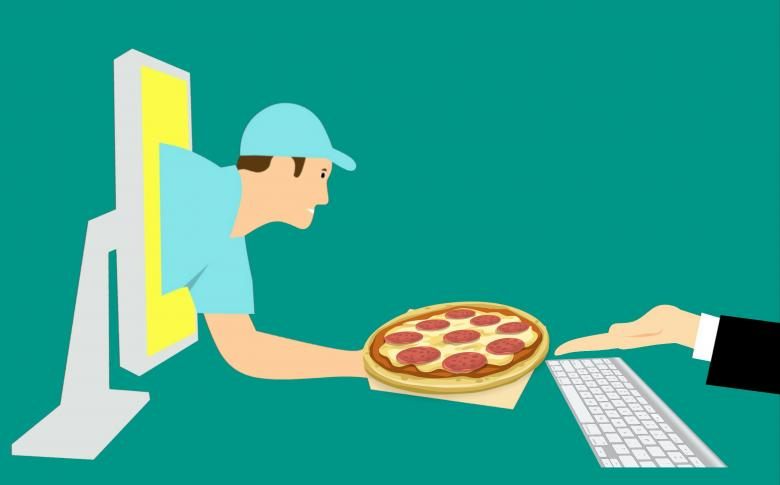

# Objetivo

Foram utilizados dados de uma pizzaria obtidos do Kaggle, os quais foram submetidos a um processo de tratamento e posteriormente analisados.

O objetivo do projeto é responder as seguintes perguntas de negócio:
- Em quais dias e horários costumamos estar mais ocupados?
- Quantas pizzas estamos fazendo durante os períodos de pico?
- Quais são as nossas melhores e as mais vendidas pizzas?
- Qual é o nosso valor médio do pedido?



# Qual o significado de cada varíavel?

- order_id: Identificador único para cada pedido feito por uma tabela

- order_details_id: identificador único para cada pizza colocada em cada pedido (pizzas do mesmo tipo e tamanho são mantidas na mesma linha e a quantidade aumenta)

- pizza_id: identificador de chave exclusivo que vincula a pizza pedida aos seus detalhes, como tamanho e preço

- quantity: Quantidade pedida para cada pizza do mesmo tipo e tamanho

- order_date: Data em que o pedido foi feito (inserido no sistema antes de cozinhar e servir)

- order_time: Hora em que o pedido foi feito (inserido no sistema antes de cozinhar e servir)

- unit_price: Preço da pizza em USD

- total_price: unit_price * quantity

- pizza_size: Tamanho da pizza (Small, Medium, Large, X Large, or XX Large)

- pizza_type: identificador de chave exclusivo que vincula a pizza pedida aos seus detalhes, como tamanho e preço

- pizza_ingredients: ingredientes usados na pizza conforme mostrado no cardápio (todos incluem Queijo Mussarela, mesmo que não 
especificado; e todos incluem Molho de Tomate, a menos que outro molho seja especificado)

- pizza_name: Nome da pizza conforme mostrado no menu

# Carregamento e Entendimento dos Dados

In [46]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import date, datetime
pd.set_option('display.max_columns',25)
paleta = 'Green'
cor = 'darkcyan'
cores_hex = ['#66CDAA', '#7FFFD4', '#40E0D0', '#00FFFF', '#20B2AA', '#008B8B', '#5F9EA0']
cores = ['mediumaquamarine','aquamarine','turquoise','cyan','lightseagreen','darkcyan','cadetblue']

In [2]:
#Importando os dados
df = pd.read_excel(r"Data Model - Pizza Sales.XLSX")

In [3]:
#Observando minha base de dados
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
#Verificando as métricas dos dados
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
#Verificando o tipo de cada coluna
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [6]:
#Verificando se há valor nulo
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

# Perguntas do négocio

## Em quais dias e horários costumamos estar mais ocupados?

Para responder a essa questão, uma nova coluna foi criada na base de dados ("order_day"), identificando os dias por nome. Posteriormente, foi contabilizado o número de pedidos realizados em cada dia e um gráfico foi gerado com esses dados.

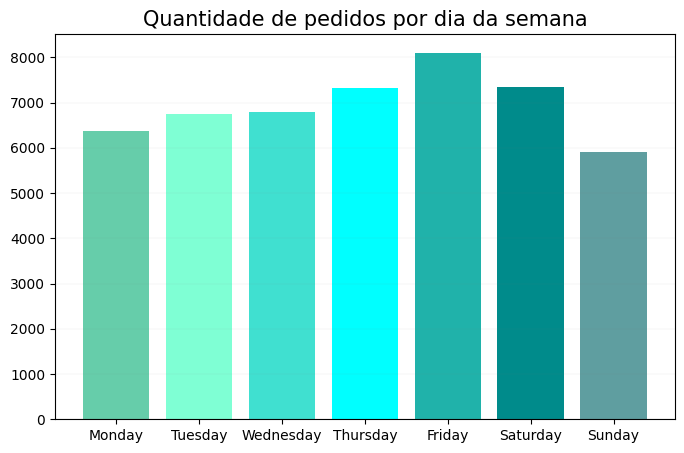

In [7]:
# Mudando a coluna Order_Day de Dia do mes para o nome dos dias da semana
df["order_day"] = df["order_date"].dt.day_name()
# Contando a quantidade de pedidos por dia da semana
QuantityperWeek = df["order_day"].value_counts()

#Fazendo um loop "for" para plotar um gráfico a partir de um dicionário de maneira decrescente
i = 0
keys = []
values = []

for i in QuantityperWeek.index:
    keys.append(i)

for i in QuantityperWeek:
    values.append(i)
      
DicPerWeek = {}
DicPerWeek = {key : value for key, value in zip(keys, values)}

# Ordenando os dias da semana em ordem padrão de segunda a domingo
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Obtendo os valores correspondentes aos dias ordenados
valores_ordenados = [DicPerWeek[dia] for dia in dias_semana_ordenados]

#Plotando o gráfico
plt.figure(figsize = (8,5))
plt.bar(dias_semana_ordenados, valores_ordenados, color=cores)
plt.title("Quantidade de pedidos por dia da semana", size = 15)
plt.grid(axis='y',color='gray', linewidth=0.05)
plt.show()

De acordo com o gráfico, observamos que os dias com a maior quantidade de pedido foram as **Sextas-Feiras e os Sabados**. O que é totalmente tolerável, considerando que são dias do final da semana, aumentando consideravelmente a quantidade de pedidos.

Porém, as Sextas-Feiras e os sábados são dias com mais pedidos em todos os meses do ano?

In [8]:
# Criando uma nova coluna com os mes sendo identificados pelos nomes
df['order_namemonth'] = df['order_date'].dt.month_name()

# Transformando a coluna "order_date" em string
df['order_date'] = df['order_date'].astype(str)

# Transformando a coluna "order_month" em Ano-Mes, para deixar meu gráfico ordenado em ordem cronológica
df['order_month']  = df['order_date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

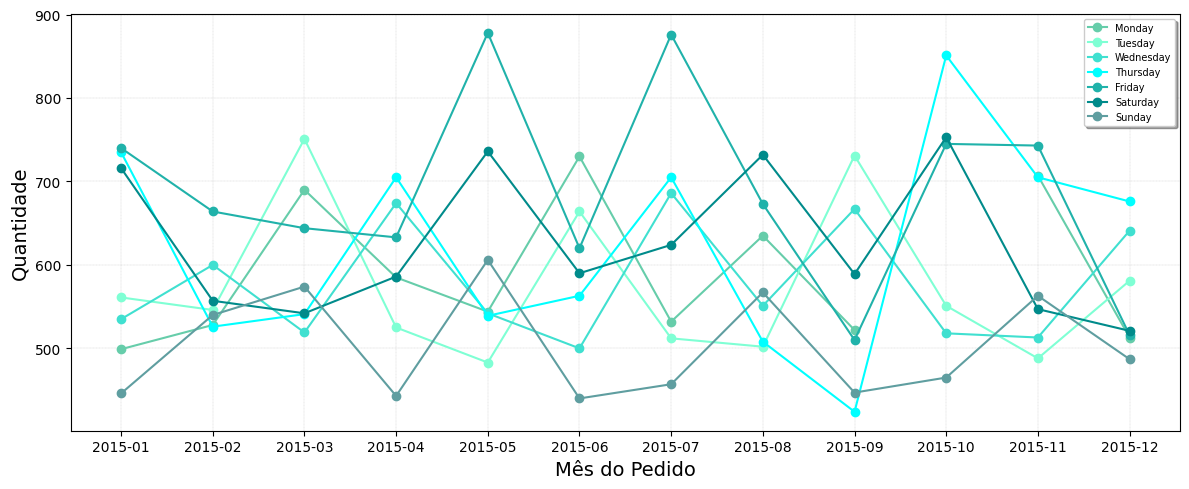

In [9]:
# Reorganizando os dados para plotar séries temporais por dia da semana
dados_por_dia_semana = df.groupby(['order_month', 'order_day'])['quantity'].sum().unstack()
dados_por_dia_semana = dados_por_dia_semana.reindex(columns=dias_semana_ordenados)

# Plotando um gráfico de linha para cada dia da semana com cores diferentes
plt.figure(figsize=(12, 5))
for i, dia in enumerate(dados_por_dia_semana.columns):
    plt.plot(dados_por_dia_semana.index, dados_por_dia_semana[dia], marker="o", color=cores[i], label=dia)

plt.grid(linestyle='--', linewidth=0.2)
plt.legend(shadow=True, fontsize=7)
plt.xlabel('Mês do Pedido', size = 14)
plt.ylabel('Quantidade', size = 14)
plt.tight_layout()
plt.show()

Do gráfico, percebe-se que nem todos os meses têm as **Sextas-feiras e Sábados** como os dias com **maior número de pedidos**. Isso pode ser atribuído aos feriados ocorrendo em outros dias da semana, o que aumenta a **quantidade em dias atípicos**. O **Domingo** se mantém como o dia com a **menor média de pedidos**, abaixo das demais datas no gráfico.

Neste momento, busca-se responder à segunda parte da pergunta: **"Quais horários costumam estar mais movimentados?"**. 
Para isso, é necessário separar o horário em três colunas (**"Hora, Minutos e Segundos"**), utilizando apenas a coluna "Hora" para identificar os períodos com maior número de pedidos.

In [10]:
# Transformando a coluna em string
df["order_time"] = df["order_time"].astype("string")
# Criando 3 novas colunas: (Hora,Minutos,Segundos)
df[["hour","minute","second"]] = df["order_time"].str.split(":",expand=True)

# Somando a quantidade de pedidos por hora
QuantityPerHour = df.hour.value_counts().sort_index()
QuantityPerHour

09       4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: hour, dtype: Int64

Pode-se analisar que o horário de funcionamento do estabelecimento é de **9h às 23h**, oferecendo um amplo horário para atender seus clientes.

{'09': 4, '10': 17, '11': 2672, '12': 6543, '13': 6203, '14': 3521, '15': 3170, '16': 4185, '17': 5143, '18': 5359, '19': 4350, '20': 3487, '21': 2528, '22': 1370, '23': 68}


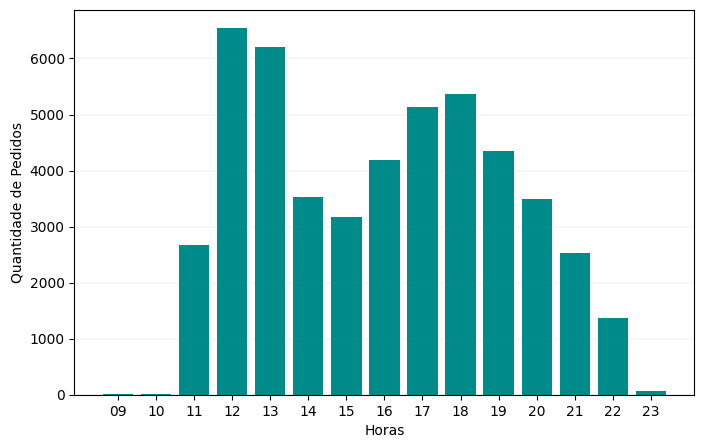

In [11]:
#Fazendo novamente um loop "for" para plotar um gráfico a partir de um dicionário de maneira que o horario fique crescente
i = 0
keys2 = []
values2 = []

for i in QuantityPerHour.index:
    keys2.append(i)

for i in QuantityPerHour:
    values2.append(i)
      
DicPerHour = {}
DicPerHour = {key2 : value2 for key2, value2 in zip(keys2, values2)}
print(DicPerHour)

# Plotando o gráfico
plt.figure(figsize = (8,5))
plt.bar(DicPerHour.keys(), DicPerHour.values(), color = cor)
plt.xlabel("Horas")
plt.ylabel("Quantidade de Pedidos")
plt.grid(axis='y',color='gray', linewidth=0.1)
plt.show()

A análise do gráfico revela que o intervalo entre **12:00 e 14:00** registra o **maior volume de pedidos**, totalizando **12.746** solicitações durante essa faixa horária.

Posteriormente, outro período de alta demanda ocorre entre **17:00 e 19:00**, com um total de **10.502 pedidos**.

## Quantas pizzas estamos fazendo durante os períodos de pico?

A seguir, um gráfico de linha será exibido mostrando o total de pizzas vendidas durante o período de um ano, abrangendo de janeiro de 2015 a dezembro de 2015.

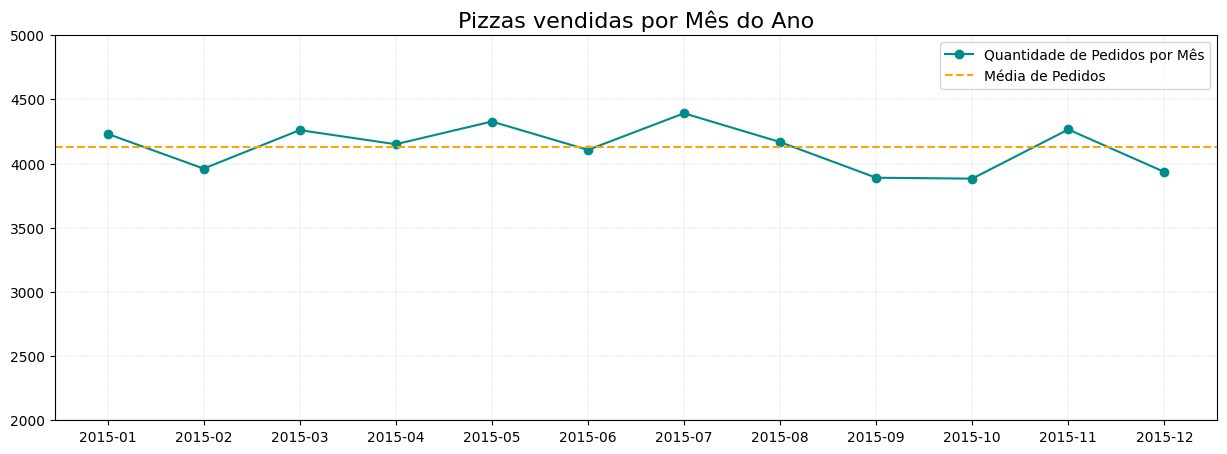

In [60]:
# Calculando a soma da quantidade de pedidos por mês
pedidos_por_mes = df.groupby('order_month')['quantity'].sum()

# Calculando a média de pedidos por mês
media_pedidos = pedidos_por_mes.mean()

# Plotando o gráfico
plt.figure(figsize=(15, 5))
plt.plot(pedidos_por_mes, color=cor, marker='o', label='Quantidade de Pedidos por Mês')
plt.axhline(media_pedidos, color='orange', linestyle='--', label='Média de Pedidos')

plt.grid(linestyle='--', linewidth=0.2)
plt.title("Pizzas vendidas por Mês do Ano", size=16)
plt.ylim(2000,5000)

plt.legend()
plt.show()

Analisando o gráfico, com uma **média de 4131,167 pizzas vendidas**, destacam-se os meses de pico, **Julho (2015-07) com 4.392 pizzas vendidas** e **Maio (2015-05) com 4.328 pizzas vendidas**. Em contrapartida, os meses de baixa foram **Setembro (2015-09)** e **Outubro (2015-10)**, com **3.890 e 3.883 pizzas vendidas**, respectivamente.

# Quais são as nossas melhores e mais vendidas pizzas?

Para identificar as melhores e mais vendidas pizzas, é necessário realizar duas etapas. Primeiro, é preciso calcular a quantidade de pedidos por categoria para possibilitar a criação do gráfico correspondente. Em seguida, é necessário calcular a quantidade de pedidos por mês e por categoria. 

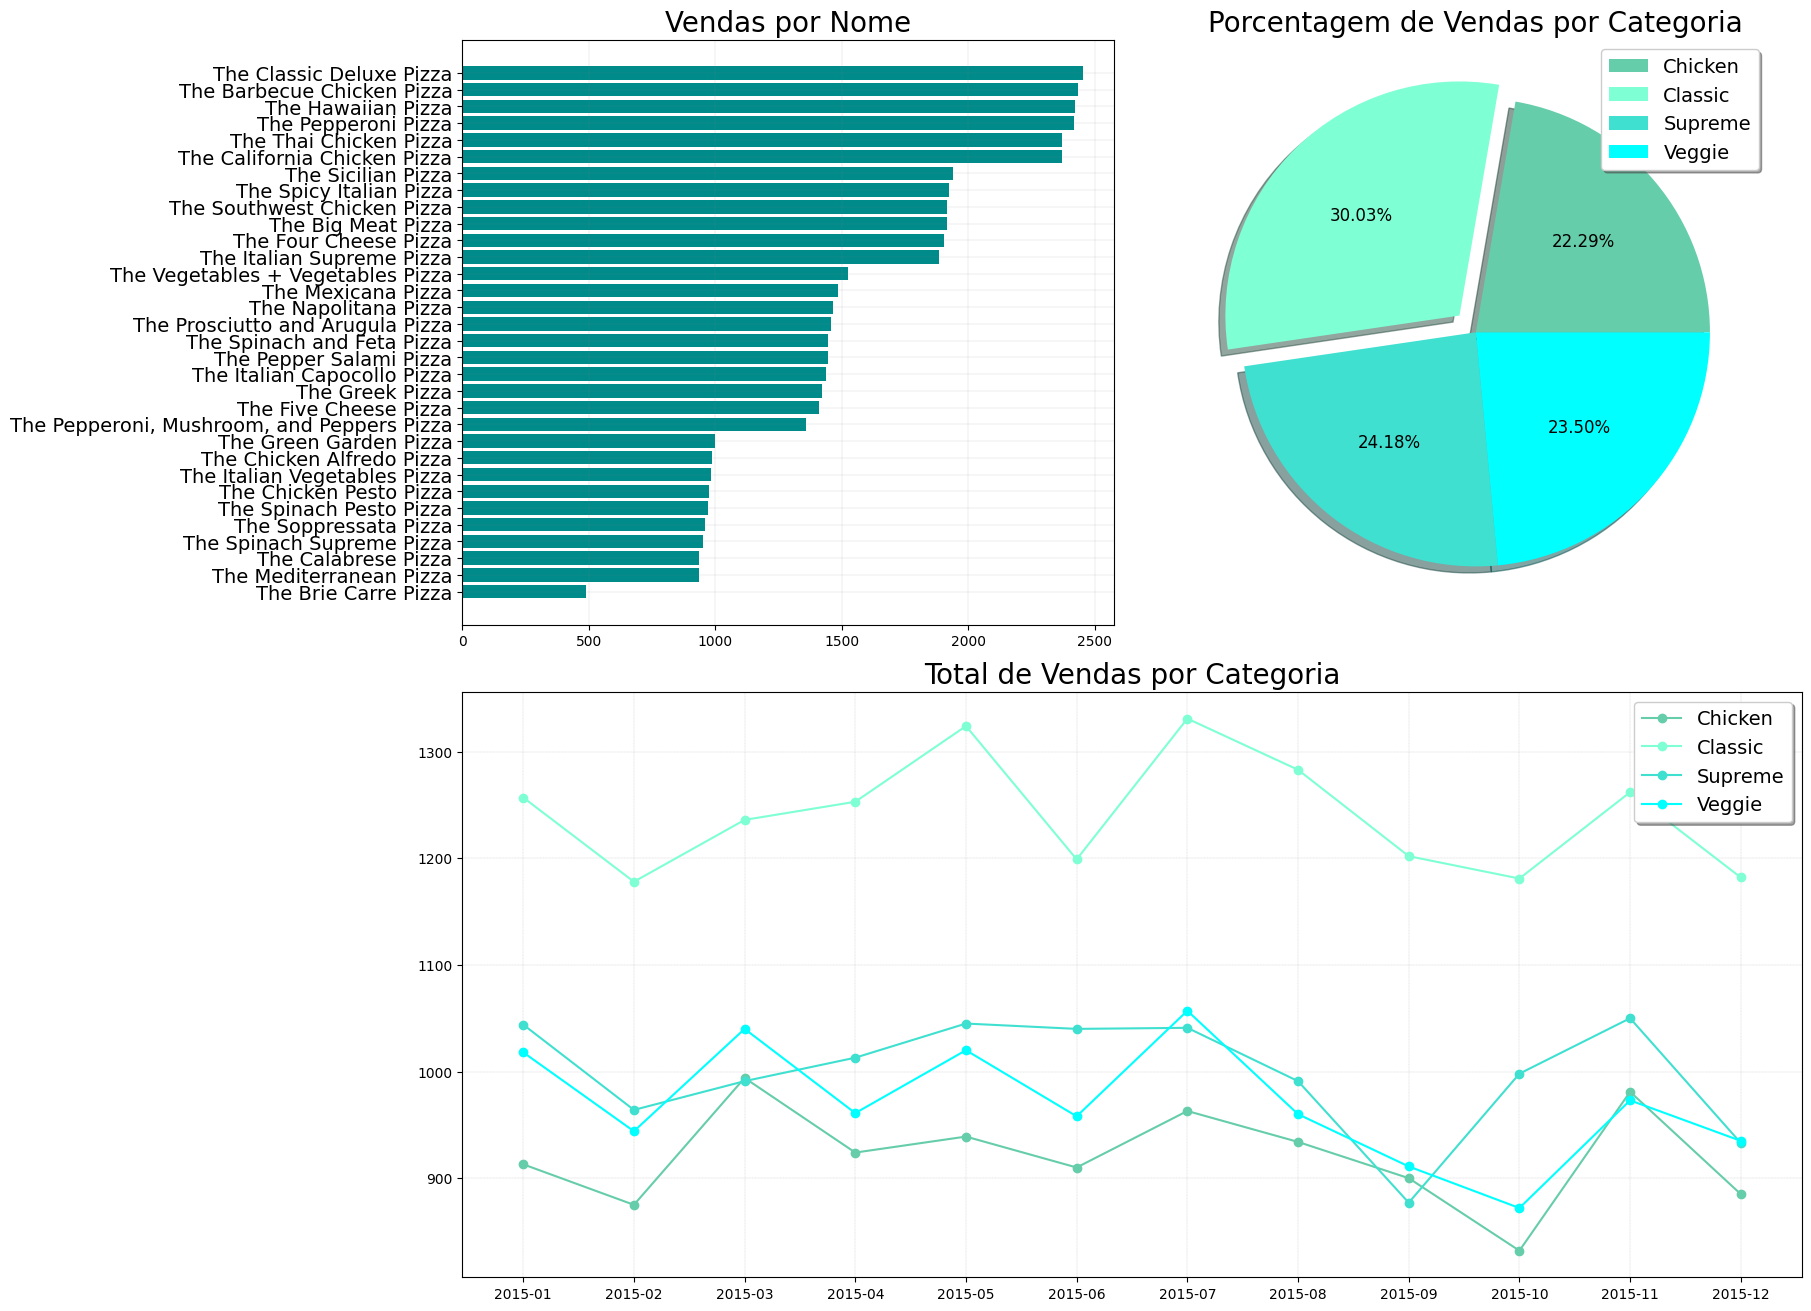

In [13]:
# Plotando os gráficos em formato de mosaico
fig = plt.figure(constrained_layout = True, figsize = (18,13))

# Configurando como serão distribuídos os gráficos
mosaic = fig.subplot_mosaic("""
          AB
          CC
          """)

# Verificando a quantidade de pizza por nome
salespername = df.groupby(['pizza_name'])['quantity'].sum().sort_values().reset_index()

# Plotando um gráfico de barra
mosaic['A'].barh(salespername['pizza_name'], salespername['quantity'], color = 'darkcyan')
mosaic['A'].set_title('Vendas por Nome',fontsize = 20)
mosaic['A'].grid(color='gray', linewidth=0.1)
mosaic['A'].tick_params(axis='y', labelsize=14)


# Contando a quantidade de pedidos por categoria
pizzascategory = df.groupby('pizza_category')['quantity'].sum().reset_index()

# Plotagem do gráfico de pizza para a porcentagem de vendas por categoria
patches, text, autotexts = mosaic['B'].pie(pizzascategory['quantity'], shadow=True, explode=(0, 0.1, 0, 0), autopct='%.2f%%', colors=cores_hex)
mosaic['B'].legend(labels=pizzascategory['pizza_category'], fontsize=14, shadow=True)
mosaic['B'].set_title("Porcentagem de Vendas por Categoria", fontsize=20)

# Aumentar o tamanho do texto das porcentagens
for autotext in autotexts:
    autotext.set_fontsize(12)

# Contagem de pizza por categoria de acordo com o mês
pizzapcategoria = df.groupby(['order_month', 'pizza_category'])['quantity'].sum().unstack()

# Plotagem do gráfico de linhas para as vendas de pizza por categoria
for i, categoria in enumerate(pizzapcategoria.columns):
    mosaic['C'].plot(pizzapcategoria.index, pizzapcategoria[categoria], marker='o', color=cores_hex[i % len(cores_hex)], label=categoria)
mosaic['C'].set_title('Total de Vendas por Categoria', fontsize=20)
mosaic['C'].grid(linestyle='--', linewidth=0.2)
mosaic['C'].legend(shadow=True, fontsize=14)

plt.show()

Ao analisar os gráficos, observa-se que **a pizza mais vendida** é a **"The Classic Deluxe Pizza"**. No entanto, outras pizzas foram pedidas em quantidades similares, como as pizzas: **"The California Chicken Pizza", "The Thai Chicken Pizza", "The Pepperoni Pizza" e "The Barbecue Chicken Pizza"**.

Nota-se que a categoria **Pizzas Clássicas lidera as vendas**, representando **30% de todas as pizzas vendidas**. Em sequência, em termos de quantidade vendida, destacam-se: **Pizzas Supremas, Pizzas Veganas e Pizzas de Frango**.


# Qual é o nosso valor médio do pedido?

 - VALOR MEDIO DOS PEDIDOS

In [29]:
# Criando os valores

totalprice = [df['total_price'].sum()]
totalquantity = [df['quantity'].sum()]
ordernumber = [df['order_id'].max()]
average = [df['total_price'].sum()/df['order_id'].max()]

# Criando uma tabela com as seguintes colunas ("Orders","Total Pizza Sales", "Total Price", "Average Order Value")

infosales = pd.DataFrame(list(zip(ordernumber, totalquantity, totalprice, average)))
infosales.columns = ['Pedidos', 'Pizzas Vendidas', 'Preço Total', 'Média do valor por pedido']
infosales

,Pedidos,Pizzas Vendidas,Preço Total,Média do valor por pedido
0,21350,49574,817860.05,38.307262


Verifica-se que no **ano de 2015** foram efetuados **21.350 pedidos**, totalizando a venda de **49.574 pizzas** e um **faturamento de 8.178.760,05**. O valor médio por pedido foi de **38,31**.

- VALOR MÉDIO DOS PEDIDOS POR CATEGORIA

In [15]:
# Criando os valores
total_orderbycategory = df.groupby('pizza_category')['order_id'].nunique().reset_index()
total_pizzabycategory = df.groupby('pizza_category')['quantity'].sum().reset_index()
total_pricebycategory = df.groupby('pizza_category')['total_price'].sum().reset_index()
averagebycategory = (total_pricebycategory['total_price']/total_orderbycategory['order_id'])

In [30]:
# Criando uma tabela com as seguintes colunas ("Category","Orders", "Total preço", "Total Pizza Sales", "Average Order Value")

resume_salesbycategory = pd.DataFrame(zip(total_orderbycategory.pizza_category, total_orderbycategory.order_id, total_pizzabycategory.quantity, total_pricebycategory.total_price, averagebycategory))
resume_salesbycategory.columns = ['Categoria','Pedidos', 'Pizzas Vendidas', 'Preço Total', 'Média do valor por pedido']
resume_salesbycategory

,Categoria,Pedidos,Pizzas Vendidas,Preço Total,Média do valor por pedido
0,Chicken,8536,11050,195919.50,22.952144
1,Classic,10859,14888,220053.10,20.264582
2,Supreme,9085,11987,208197.00,22.916566
3,Veggie,8941,11649,193690.45,21.663175


É observado que as categorias **Chicken** e **Supreme** apresentam o maior valor médio, aproximadamente **23,00**. Apesar de a categoria **Classic** ter sido a mais vendida e ter gerado maior faturamento, ela possui o menor valor médio por pedido, atingindo **20,26**.

- VALOR MEDIO DOS PEDIDOS POR MÊS

In [31]:
# Criando os valoresb
total_orderbymonth = df.groupby('order_month')['order_id'].nunique().reset_index()
total_pizzabymonth = df.groupby('order_month')['quantity'].sum().reset_index()
total_pricebymonth = df.groupby('order_month')['total_price'].sum().reset_index()
averagebymonth = (total_pricebymonth['total_price']/total_orderbymonth['order_id'])

# Criando uma tabela com as seguintes colunas ("Month of Year","Orders", "Total Pizza Sales", "Total Price","Average Order Value")
resume_salesbymonth = pd.DataFrame(zip(total_orderbymonth.order_month, total_orderbymonth.order_id, total_pizzabymonth.quantity, total_pricebymonth.total_price, averagebymonth))
resume_salesbymonth.columns = ['Mês do Ano','Pedidos', 'Pizzas Vendidas', 'Preço Total', 'Média do valor por pedido']
resume_salesbymonth

,Mês do Ano,Pedidos,Pizzas Vendidas,Preço Total,Média do valor por pedido
0,2015-01,1845,4232,69793.30,37.828347
1,2015-02,1685,3961,65159.60,38.670386
2,2015-03,1840,4261,70397.10,38.259293
3,2015-04,1799,4151,68736.80,38.208338
4,2015-05,1853,4328,71402.75,38.533594
5,2015-06,1773,4107,68230.20,38.482910
6,2015-07,1935,4392,72557.90,37.497623
7,2015-08,1841,4168,68278.25,37.087588
8,2015-09,1661,3890,64180.05,38.639404
9,2015-10,1646,3883,64027.60,38.898906


O valor médio dos pedidos por mês é bastante similar, mantendo uma média de **38,32** e um desvio padrão de **0,61**. Isso indica que os dados estão muito próximos da média, sugerindo uma consistência nos valores registrados.

# Hipóteses

### Hipótese 1: Os pedidos durante os finais de semana geram um lucro superior em comparação com os pedidos durante os dias úteis da semana.

- H0 (hipótese nula): Não há diferença significativa no lucro entre os pedidos durante os finais de semana e os pedidos durante os dias úteis da semana.

- H1 (hipótese alternativa): Existe uma diferença significativa no lucro entre os pedidos durante os finais de semana e os pedidos durante os dias úteis da semana.

In [41]:
dias_fim_de_semana = ['Saturday', 'Friday', 'Sunday']
dias_semana = ['Monday','Tuesday','Wednesday','Thursday']
fds = df[df['order_day'].isin(dias_fim_de_semana)]
dias = df[df['order_day'].isin(dias_semana)]

In [44]:
fds = fds['total_price']
dias = dias['total_price']

In [62]:
# Realiza o teste t de Student para amostras independentes
alpha = 0.05  # Nível de significância
statistic, p_value = stats.ttest_ind(fds, dias)

# Verifica se o valor-p é menor que o nível de significância especificado para rejeitar ou não a hipótese nula
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Os pedidos nos finais de semanas dão significativamente mais (ou menos) lucro do que os pedidos dos dias da semana")
else:
    print("Não temos evidências suficientes para rejeitar a hipótese nula.")
    print("Os pedidos nos finais de semanas não dão significativamente mais (ou menos) lucro do que os pedidos dos dias da semana")

Rejeitamos a hipótese nula.
Os pedidos nos finais de semanas dão significativamente mais (ou menos) lucro do que os pedidos dos dias da semana


### Hipotese 2: O período da tarde é o periodo em que mais faturam, faturando cerca de 15% a mais que os outros.

In [21]:
# Somando o faturamento de acordo com a hora
periodo = df.groupby('hour')[['total_price']].sum().reset_index()
periodo

,hour,total_price
0,09,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


In [22]:
# Verificando o faturamento de acordo com o período
Manha = periodo['total_price'][[0,1,2,3,4]].sum()
Tarde = periodo['total_price'][[5,6,7,8,9]].sum()
Noite = periodo['total_price'][[10,11,12,13,14]].sum()
print(Manha,Tarde,Noite)

263266.05 357783.4 196810.59999999998


In [23]:
# Transformando a coluna em string
df["order_time"] = df["order_time"].astype("string")
# Criando 3 novas colunas: (Hora,Minutos,Segundos)
df[["hour","minute","second"]] = df["order_time"].str.split(":",expand=True)

In [24]:
# Criando uma tabela com o Período e o Total Faturado
Periodo = pd.DataFrame({'Periodo': ['Manha','Tarde','Noite'],
                        'Total Faturado': [263266.05,357789.4,196810.6]})
Periodo

,Periodo,Total Faturado
0,Manha,263266.05
1,Tarde,357789.40
2,Noite,196810.60


In [25]:
# Somando a quantidade de pedidos por hora
QuantityPerHour = df.hour.value_counts().sort_index()
QuantityPerHour

09       4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: hour, dtype: Int64

In [26]:
# 
print((Periodo['Total Faturado'][0]/Periodo['Total Faturado'][1])*100)
print((Periodo['Total Faturado'][2]/Periodo['Total Faturado'][1])*100)

73.58128832212468
55.00738702711707


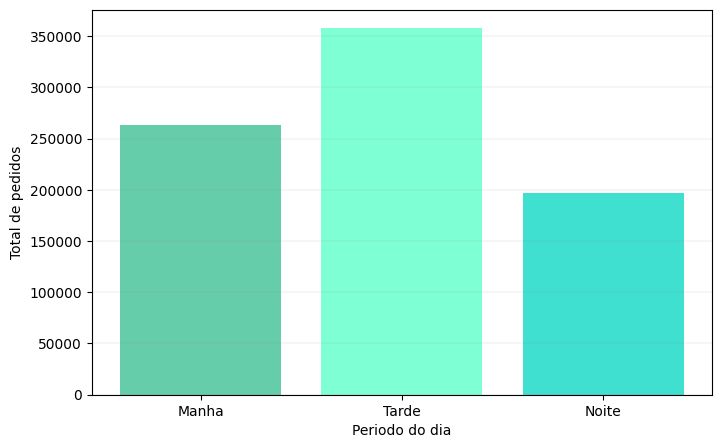

In [52]:
# Desenhando o gráfico de barras
plt.figure(figsize = (8,5))
plt.bar(Periodo['Periodo'],Periodo['Total Faturado'], 
        color = cores)
plt.ylabel("Total de pedidos")
plt.xlabel("Periodo do dia")
plt.grid(axis='y',color='gray', linewidth=0.1)
plt.show()

Conforme evidenciado pelo gráfico, o período da tarde registra o maior faturamento, atingindo aproximadamente **1,36 vezes** o valor do período da manhã e quase **1,82 vezes** o montante do período da noite.

Em termos percentuais, o período da tarde apresenta um faturamento **26,42%** superior ao período da manhã e um aumento de **45,00%** comparado ao período da noite.

# Conclusão

O projeto teve como propósito analisar os dados de vendas de uma pizzaria, visando extrair insights cruciais para a gestão do negócio. A análise de dados desempenha um papel fundamental na compreensão e no crescimento do empreendimento. Inicialmente, foram exploradas estatísticas básicas, como média, desvio padrão, entre outras, para melhor compreensão das variáveis quantitativas.

A análise revelou padrões notáveis de vendas na pizzaria. Embora Sextas-Feiras e Sábados tenham registrado as maiores quantidades de pedidos, ao longo do ano, outros dias apresentaram picos expressivos de vendas, indicando uma oscilação. Identificaram-se dois horários de maior movimento: entre 12:00 e 14:00 e entre 17:00 e 19:00. A análise mensal das vendas apontou uma média de 4131,167 unidades, com picos em Julho e Maio, totalizando 4.392 e 4.328 vendas, respectivamente. Os meses de baixa foram setembro, com 3890, e outubro, com 3883 unidades vendidas, indicando uma relativa estabilidade.

A categoria de pizzas Clássicas destacou-se como a pizza mais vendida, representando 30% do total de vendas. Ademais, A 'The Classic Deluxe Pizza' foi a pizza mais vendida. Também foram avaliados os valores médios de cada pedido considerando a categoria e o mês do ano. A realização de um teste de hipótese evidenciou que os pedidos nos finais de semana geraram significativamente mais lucro do que nos dias úteis. Outro comprovou que a tarde é o período de maior movimento em vendas.

Dessa maneira, o projeto alcançou seu objetivo ao analisar e extrair informações valiosas dos dados. Esses insights oferecem orientações cruciais para a gestão estratégica do negócio, permitindo ajustes nas estratégias comerciais para melhor atender às demandas dos clientes e otimizar o desempenho geral da pizzaria.